In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import string
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

import os
for dirname, _, filenames in os.walk('/content/spam.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [33]:
df = pd.read_csv("/content/spam.csv", encoding="latin-1")

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [34]:
df = df.dropna(how="any", axis=1)
df.columns = ['target', 'message']

df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


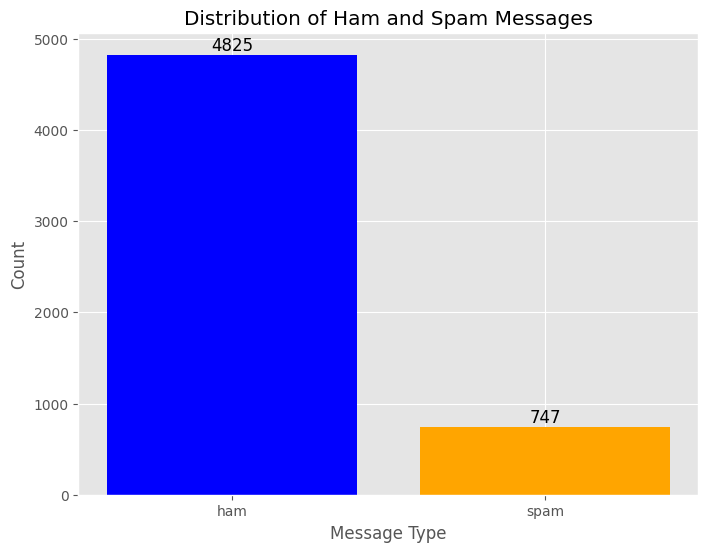

In [35]:
# Count the occurrences of each target
label_counts = df['target'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
bars = plt.bar(label_counts.index, label_counts.values, color=['blue', 'orange'])

# Annotate the plot with the counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center', fontsize=12)

# Set plot labels and title
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.title('Distribution of Ham and Spam Messages')
plt.show()

In [36]:
# Calculate the length of each message
df['length'] = df['message'].apply(lambda x: len(x.split(' ')))

# Separate the data into ham and spam messages
ham_length = df[df['target'] == 'ham']['length']
spam_length = df[df['target'] == 'spam']['length']


print(f'Max length of ham message: {max(ham_length)}')
print(f'Max length of spam message: {max(spam_length)}')

Max length of ham message: 171
Max length of spam message: 35


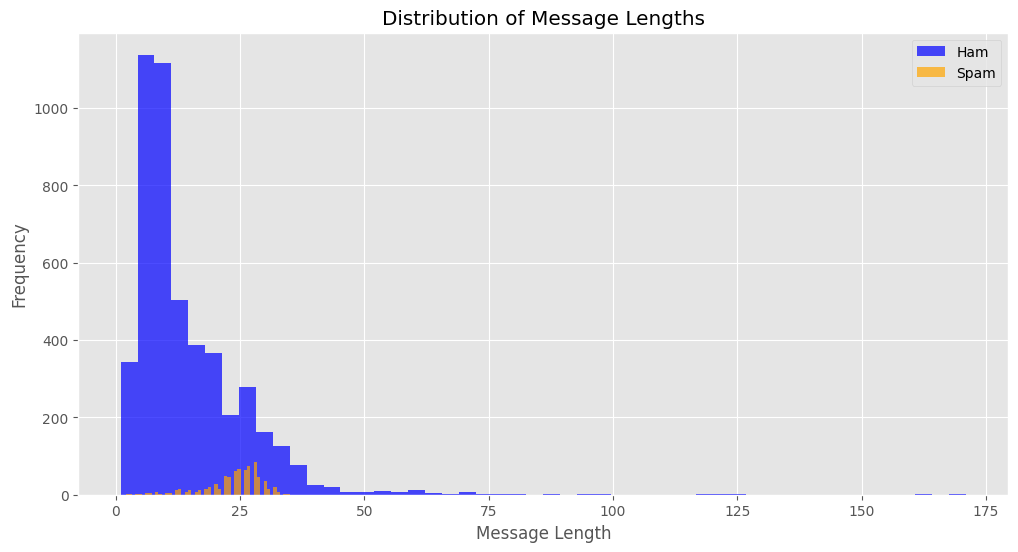

In [37]:
# Plot the distribution
plt.figure(figsize=(12, 6))

# Ham message lengths
plt.hist(ham_length, bins=50, alpha=0.7, label='Ham', color='blue')
# Spam message lengths
plt.hist(spam_length, bins=50, alpha=0.7, label='Spam', color='orange')

plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [38]:
# Remove urls, mentions and punctuations
def remove_punc(text):
    # Define regex patterns
    url_pattern = r'https?://\S+|www\.\S+'
    mention_pattern = r'@\w+'

    # Remove URLs, mentions, punctuations
    text = re.sub(url_pattern, '', text)
    text = re.sub(mention_pattern, '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    return text.strip()

df['wo_punc'] = df['message'].apply(lambda text: remove_punc(text))
# Remove Stopwords

In [39]:
# Remove urls, mentions and punctuations
def remove_punc(text):
    # Define regex patterns
    url_pattern = r'https?://\S+|www\.\S+'
    mention_pattern = r'@\w+'

    # Remove URLs, mentions, punctuations
    text = re.sub(url_pattern, '', text)
    text = re.sub(mention_pattern, '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    return text.strip()

df['wo_punc'] = df['message'].apply(lambda text: remove_punc(text))
# Remove Stopwords

In [45]:
# Apply Stemming
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["stemmed_text"] = df["wo_punc"].apply(lambda text: stem_words(text))

df.head()

,target,message,length,wo_punc,stemmed_text
0,ham,"Go until jurong point, crazy.. Available only ...",20,Go until jurong point crazy Available only in ...,go until jurong point crazi avail onli in bugi...
1,ham,Ok lar... Joking wif u oni...,6,Ok lar Joking wif u oni,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,Free entry in 2 a wkly comp to win FA Cup fina...,free entri in 2 a wkli comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,11,U dun say so early hor U c already then say,u dun say so earli hor u c alreadi then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,Nah I dont think he goes to usf he lives aroun...,nah i dont think he goe to usf he live around ...


In [46]:
X = df['stemmed_text']
y = df['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4179,) (4179,)
(1393,) (1393,)


In [47]:
# Vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

vocab_size = len(vectorizer.vocabulary_)
print(f'Vocabulary Size: {vocab_size}')

Vocabulary Size: 6858


In [48]:
# Initialize the classifier
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [49]:
# Predict the test data
y_pred = model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
f1 = f1_score(y_test, y_pred, pos_label='spam')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.96
Precision: 0.99
Recall: 0.73
F1 Score: 0.84

Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1202
        spam       0.99      0.73      0.84       191

    accuracy                           0.96      1393
   macro avg       0.98      0.86      0.91      1393
weighted avg       0.96      0.96      0.96      1393


Confusion Matrix:
[[1201    1]
 [  52  139]]
